# Jackknife vs. Mode Counting for a Full Sky map

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy  as np
import healpy as hp
from utils import split_jackknife, hpix2radec, clerr_jack

camb is not installed!


# Create a synthetic C$_{\ell}$

In [2]:
plt.rc('font', size=20)

Text(0,0.5,'C$_{\\ell}$')

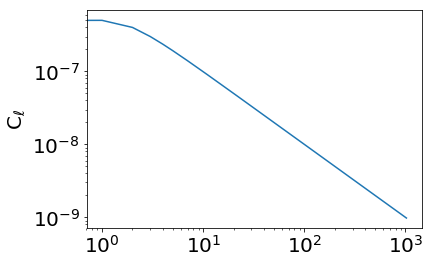

In [3]:
elt = np.arange(1024)
cl = 1.e-6*(0.001+elt)/(1+elt*elt)
plt.loglog(elt, cl)
plt.ylabel('C$_{\ell}$')

Use `synfast` to make a map based on the C_ell

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


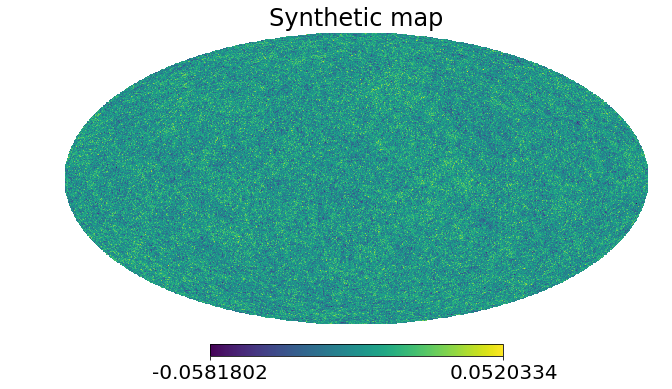

In [4]:
map1 = hp.synfast(cl, nside=256, new=True)
hp.mollview(map1, title='Synthetic map')

# Measure the C_ell
The code takes mask and weight arrays, I'll pass ones.

In [5]:
mask   = np.ones(map1.size, '?')
weight = np.ones(map1.size, '?')
#
# compute C_ells including jackknife errors
cl_errjk = clerr_jack(map1, mask, weight, njack=20, lmax=512)

# of jackknifes 20, input : 20


In [6]:
el     = np.arange(513)        # from 0 to 513
cl_aut = cl_errjk['cljks'][-1] # Auto C_ell
cl_jk = cl_errjk['clerr']      # Jackknife Errors
cl_mc = cl_errjk['cljks'][-1] / np.sqrt(0.5*(2*el+1)) # Modecounting

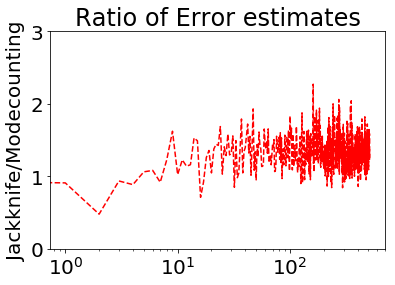

In [7]:
plt.figure()
plt.title('Ratio of Error estimates')
plt.plot(el, cl_jk/cl_mc, 'r--')
plt.ylim(0, 3)
plt.xscale('log')
_=plt.ylabel('Jackknife/Modecounting')

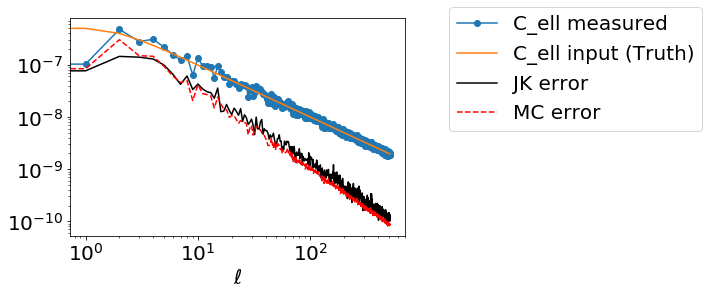

In [9]:
plt.plot(el, cl_aut, marker='o', label='C_ell measured')
plt.plot(el, cl[:513], label='C_ell input (Truth)')
plt.plot(el, cl_jk, 'k-', label='JK error')
plt.plot(el, cl_mc, 'r--', label='MC error')
plt.loglog()
plt.xlabel(r'$\ell$')
_=plt.legend(bbox_to_anchor=(1.1, 1.1))